In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

def plot_difference(year1, year2, path="/home/trojern02/Meteorology2024/analysis/", cmap="RdBu"):    
    file1 = Path(path) / f"era5-{year1}.nc"
    file2 = Path(path) / f"era5-{year2}.nc"
    if not file1.exists() or not file2.exists():
        raise FileNotFoundError(f"Eine oder beide Dateien existieren nicht: {file1}, {file2}")
    
    ds1 = xr.open_dataset(file1)
    ds2 = xr.open_dataset(file2)
    diff = ds2["pvpot2"] - ds1["pvpot2"]
    
    fig, ax = plt.subplots(figsize=(5, 3), subplot_kw={'projection': ccrs.PlateCarree()})
    contour = ax.contourf(ds1.longitude, ds1.latitude, diff[0, :, :], cmap="bwr", extend="both")
    fig.colorbar(contour, ax=ax, orientation="vertical")
    
    ax.coastlines(color='black', linewidth=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linestyle="None")
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    
    plt.title(f"Difference in PV Potential ({year1} - {year2})")
    plt.show()

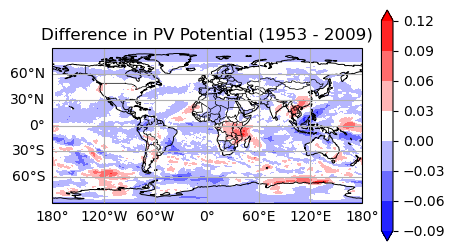

In [17]:
# I used my path, but you can also simply add it as a third parameter
plot_difference(1953, 2009)